In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('web-page-phishing.csv')
df.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [4]:
df.shape

(100077, 20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

In [13]:
df.isna().sum()

url_length        0
n_dots            0
n_hypens          0
n_underline       0
n_slash           0
n_questionmark    0
n_equal           0
n_at              0
n_and             0
n_exclamation     0
n_space           0
n_tilde           0
n_comma           0
n_plus            0
n_asterisk        0
n_hastag          0
n_dollar          0
n_percent         0
n_redirection     0
phishing          0
dtype: int64

In [5]:
df.describe()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
count,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000
mean,39.177683,2.224397,0.405188,0.137724,1.135386,0.024391,0.215834,0.022143,0.143330,0.002608,0.004876,0.003617,0.002378,0.002468,0.004097,0.000450,0.001899,0.109286,0.361532,0.363340
std,47.971847,1.255046,1.285465,0.723995,1.828526,0.167789,0.959802,0.268393,0.913656,0.082207,0.144569,0.078500,0.079558,0.104382,0.284046,0.058028,0.097412,1.695327,0.775492,0.480964
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4165.000000,24.000000,43.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,18.000000,5.000000,11.000000,19.000000,60.000000,13.000000,10.000000,174.000000,17.000000,1.000000


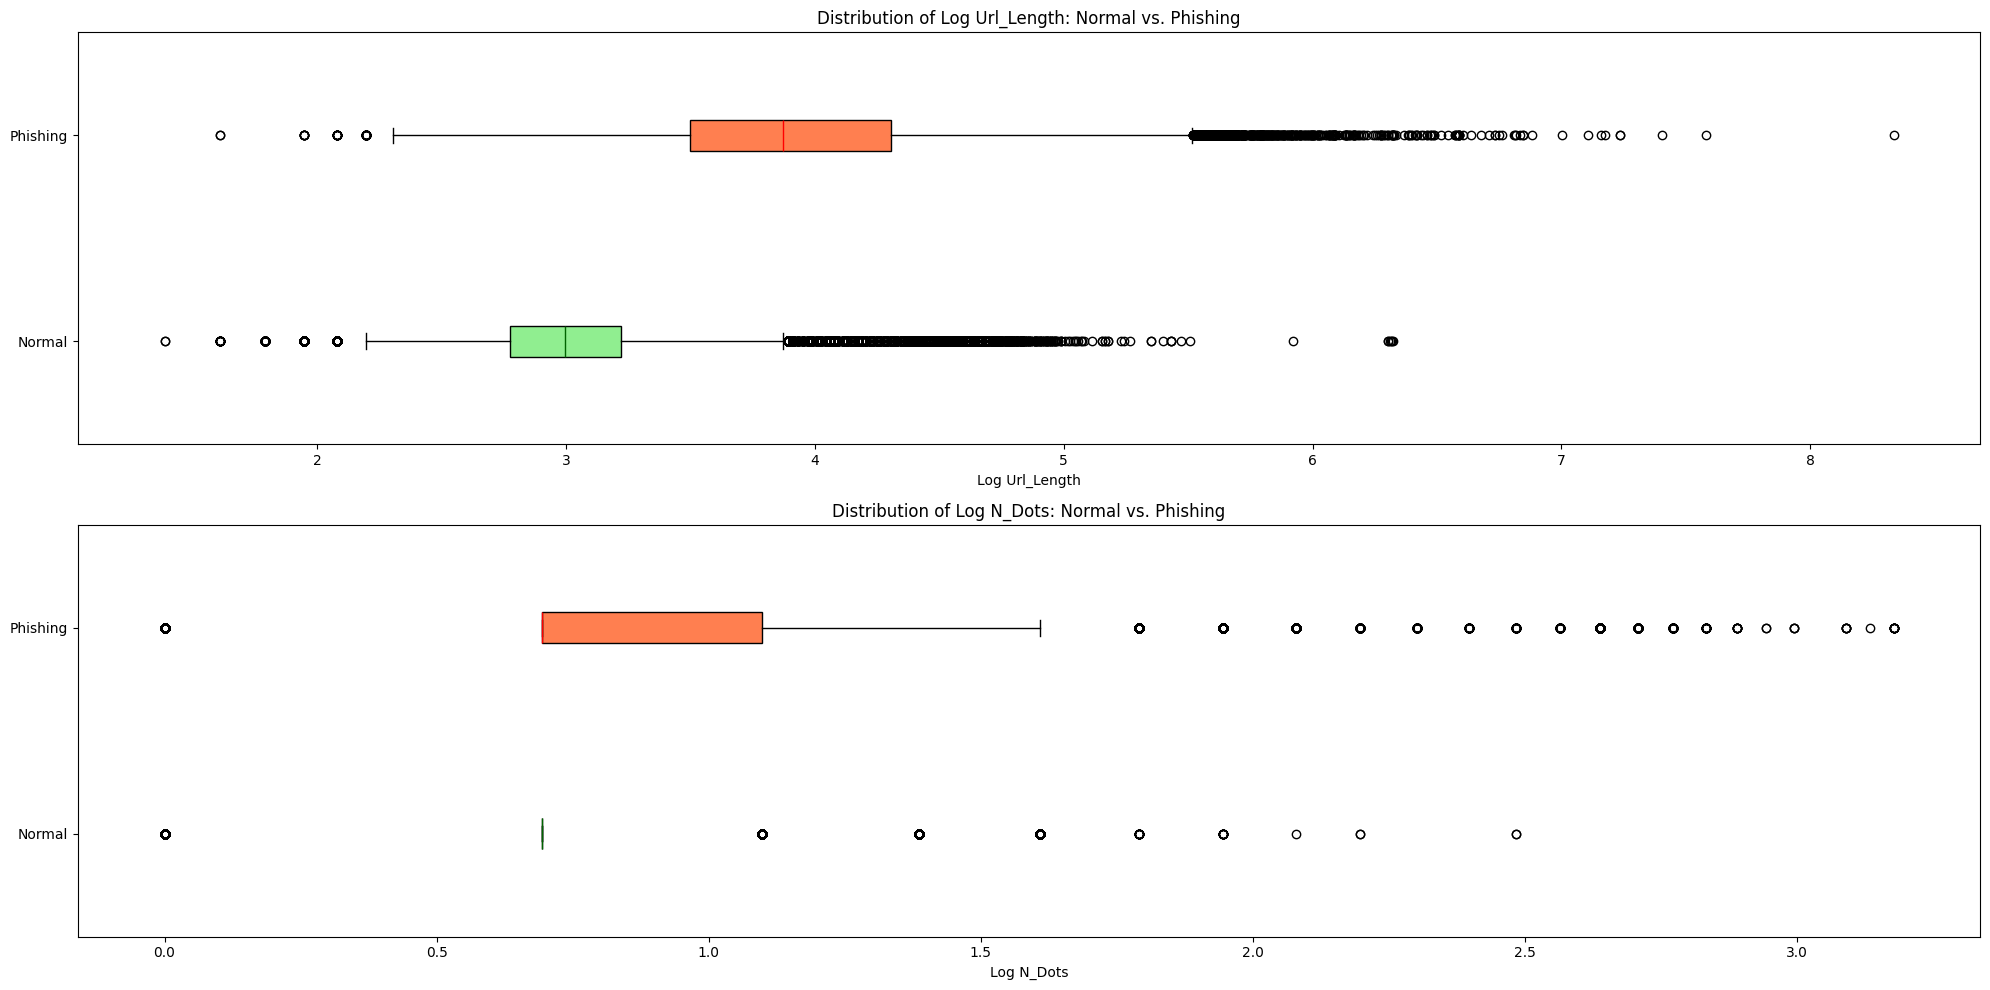

In [6]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(20,10))
for i,col in enumerate(['url_length','n_dots']):
    ax[i].boxplot(np.log(df.loc[df['phishing'] == 0,col]), 
            vert=False, positions=[1], patch_artist=True,
            boxprops=dict(facecolor='lightgreen'), 
            medianprops=dict(color='darkgreen'))  
    ax[i].boxplot(np.log(df.loc[df['phishing'] == 1,col]), 
            vert=False, positions=[2], patch_artist=True,
            boxprops=dict(facecolor='coral'), 
            medianprops=dict(color='red'))  
    ax[i].set_title(f'Distribution of Log {col.title()}: Normal vs. Phishing')
    ax[i].set_xlabel(f'Log {col.title()}')
    ax[i].set_yticks([1, 2], ['Normal', 'Phishing'])
    
plt.tight_layout()
plt.show()

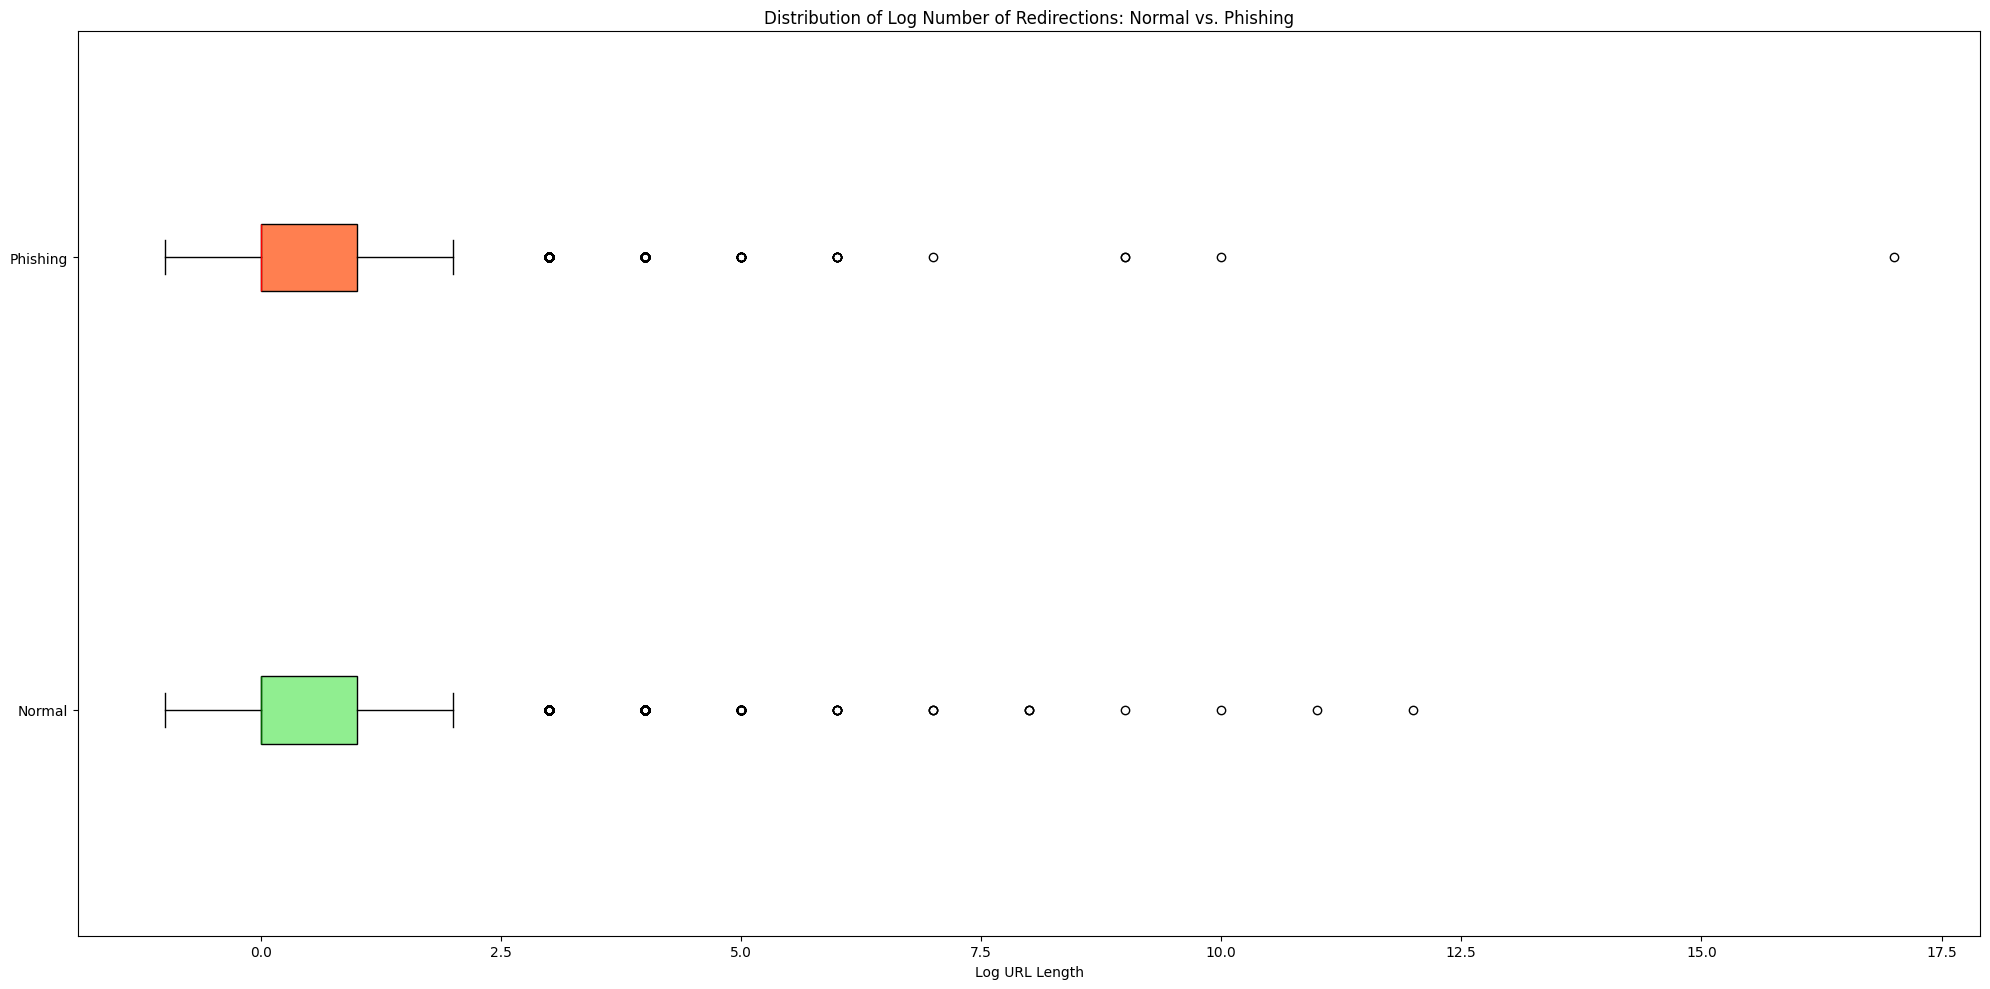

In [7]:
plt.figure(figsize=(20,10))
plt.boxplot((df.loc[df['phishing'] == 0,'n_redirection']), 
            vert=False, positions=[1], patch_artist=True,
            boxprops=dict(facecolor='lightgreen'), 
            medianprops=dict(color='darkgreen'))  
plt.boxplot((df.loc[df['phishing'] == 1,'n_redirection']), 
            vert=False, positions=[2], patch_artist=True,
            boxprops=dict(facecolor='coral'), 
            medianprops=dict(color='red'))  
plt.title('Distribution of Log Number of Redirections: Normal vs. Phishing')
plt.xlabel('Log URL Length')
plt.yticks([1, 2], ['Normal', 'Phishing'])
plt.tight_layout()
plt.show()

In [9]:
descriptive_stats = df.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19]].groupby('phishing').describe()
descriptive_stats

n_hypens                                               n_underline  \
            count      mean       std  min  25%  50%  75%   max       count   
phishing                                                                      
0         63715.0  0.259123  1.132106  0.0  0.0  0.0  0.0  43.0     63715.0   
1         36362.0  0.661130  1.482982  0.0  0.0  0.0  1.0  35.0     36362.0   

                    ... n_dollar       n_percent                           \
              mean  ...      75%   max     count      mean       std  min   
phishing            ...                                                     
0         0.045672  ...      0.0   0.0   63715.0  0.075838  1.530602  0.0   
1         0.299021  ...      0.0  10.0   36362.0  0.167895  1.949346  0.0   

                                
          25%  50%  75%    max  
phishing                        
0         0.0  0.0  0.0  174.0  
1         0.0  0.0  0.0  162.0  

[2 rows x 128 columns]

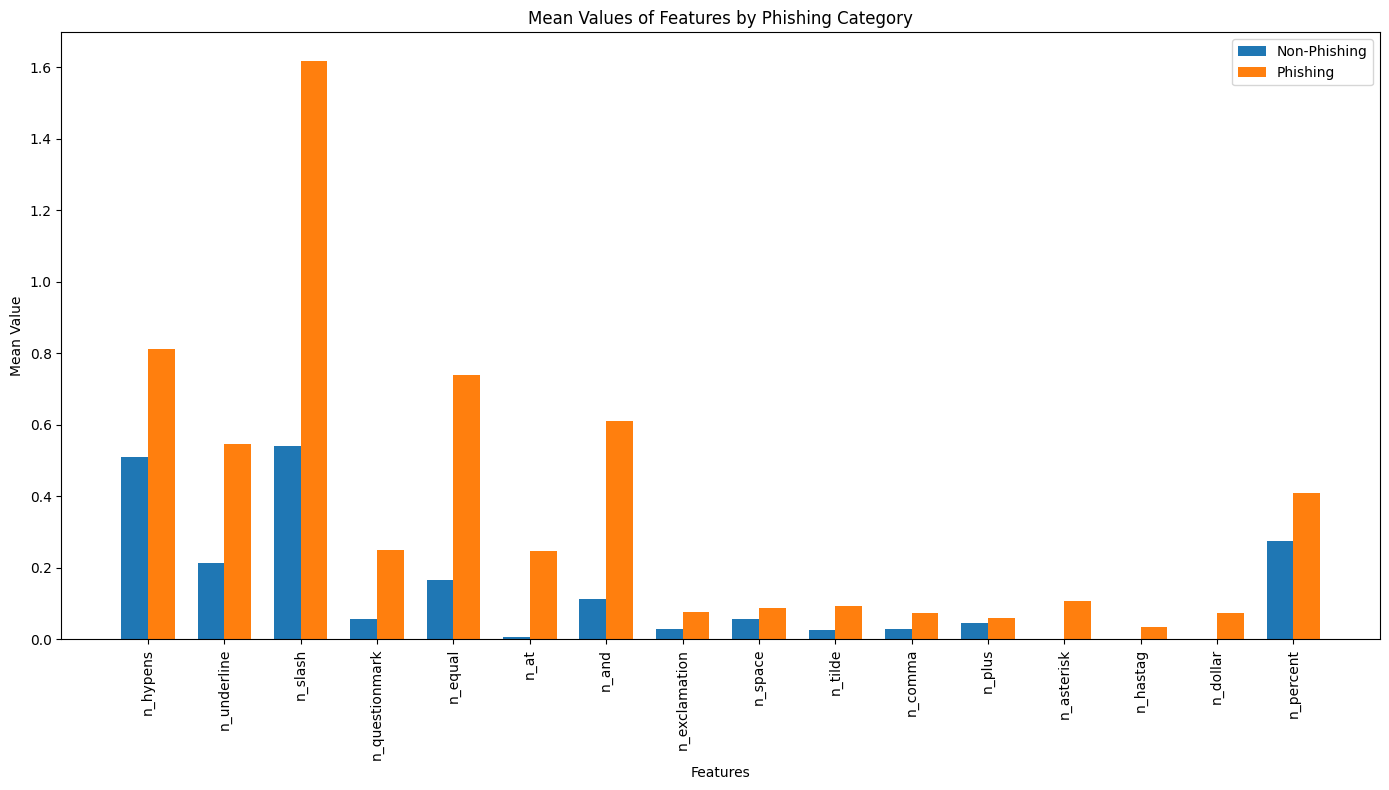

In [10]:
stat_data = descriptive_stats.xs('mean', level=1, axis=1)
stat_data = np.sqrt(stat_data)

n_features = len(stat_data.columns)
index = np.arange(n_features)
bar_width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(index, stat_data.iloc[0], bar_width, label='Non-Phishing')
plt.bar(index + bar_width, stat_data.iloc[1], bar_width, label='Phishing')

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features by Phishing Category')
plt.xticks(index + bar_width / 2, stat_data.columns, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

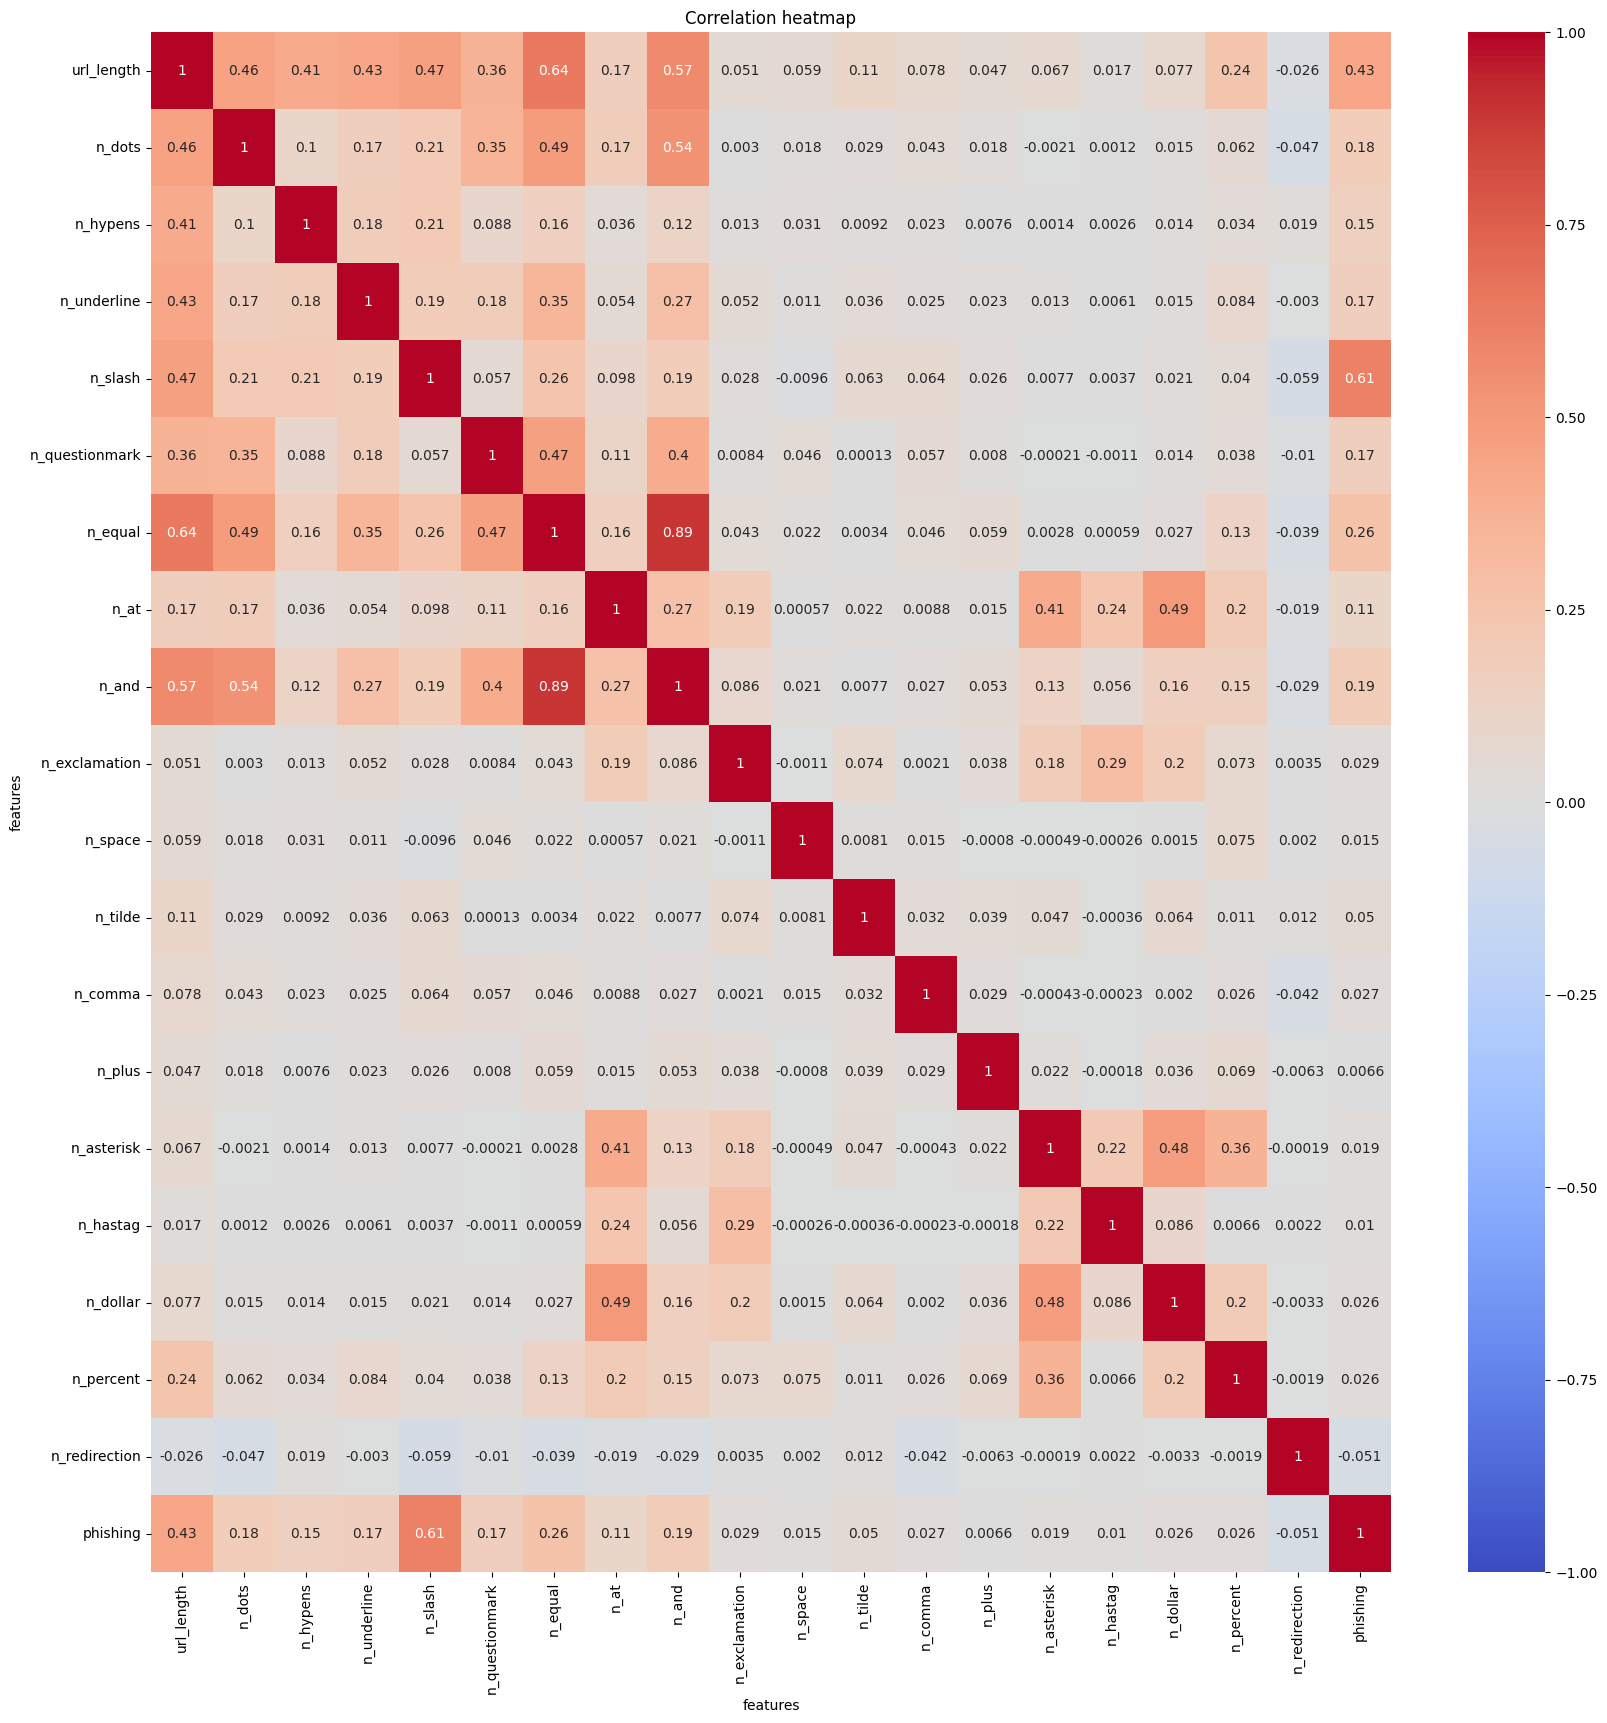

In [11]:
corr_coeff=df.corr()
plt.figure(figsize=(20,20))
heatmap=sns.heatmap(corr_coeff,vmin=-1,vmax=1,annot=True,cmap='coolwarm')
heatmap.set_xlabel('features')
heatmap.set_ylabel('features')
heatmap.set_title('Correlation heatmap')
plt.show()

In [14]:
X = df.drop(['phishing'],axis=1).values
y = df['phishing'].values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential